In [2]:
import sys
sys.path.insert(0, '../../../network')
sys.path.insert(0, '../../../figures')
from sequences import GaussianSequence
from transfer_functions import ErrorFunction
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import learning_performance
from learning import ReachingTask



In [3]:
# Set font family globally
sns.set_style('white') 
plt.rcParams["font.family"] = 'arial'
colors = sns.color_palette('deep')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.linewidth'] = 0.1

In [4]:
filename = './learning-0005-1600-600-5-1000-v0.npz'
data = np.load(filename) 
overlaps_ctx = data['overlaps_ctx']
overlaps_bg = data['overlaps_bg']
correlations_ctx = data['correlations_ctx']
correlations_bg = data['correlations_bg']
state_ctx = data['state_ctx']
state_bg = data['state_bg']

In [ ]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
for i in range(len(overlaps_ctx)):
    axes[0].plot(overlaps_ctx[i], linewidth=3, color=colors[i])
# axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
# axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
# axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=28, weight='bold')
for i in range(len(overlaps_bg)):
    axes[1].plot(overlaps_bg[i], linewidth=3, color=colors[i])
# axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
# axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
# axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("STR", fontsize=28, weight='bold')
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(500000, 600000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
# plt.savefig('./output/seq7.svg', dpi=300, bbox_inches = "tight", format='svg')
plt.show()


In [ ]:
fig, axes = plt.subplots(sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
idxs = np.argsort([np.argmax(r) for r in state_ctx[:,402500: 404200]])
idxs = [i for i in idxs if state_ctx[:,402500: 404200][i].max() > 0.00]
axes.pcolormesh(state_ctx[idxs], vmin=0.0, vmax=1.0, cmap='viridis', rasterized=True)
axes.set_xlabel('Time (ms)', fontsize=25)
axes.set_ylabel('Neuron unit', fontsize=25)
axes.set_yticks([0, 1000])
plt.setp(axes, xlim=(0, 500000))
plt.savefig('./learning-0005-1600-5-v1-raster.svg', dpi=300, bbox_inches = "tight", format='svg')
plt.show()

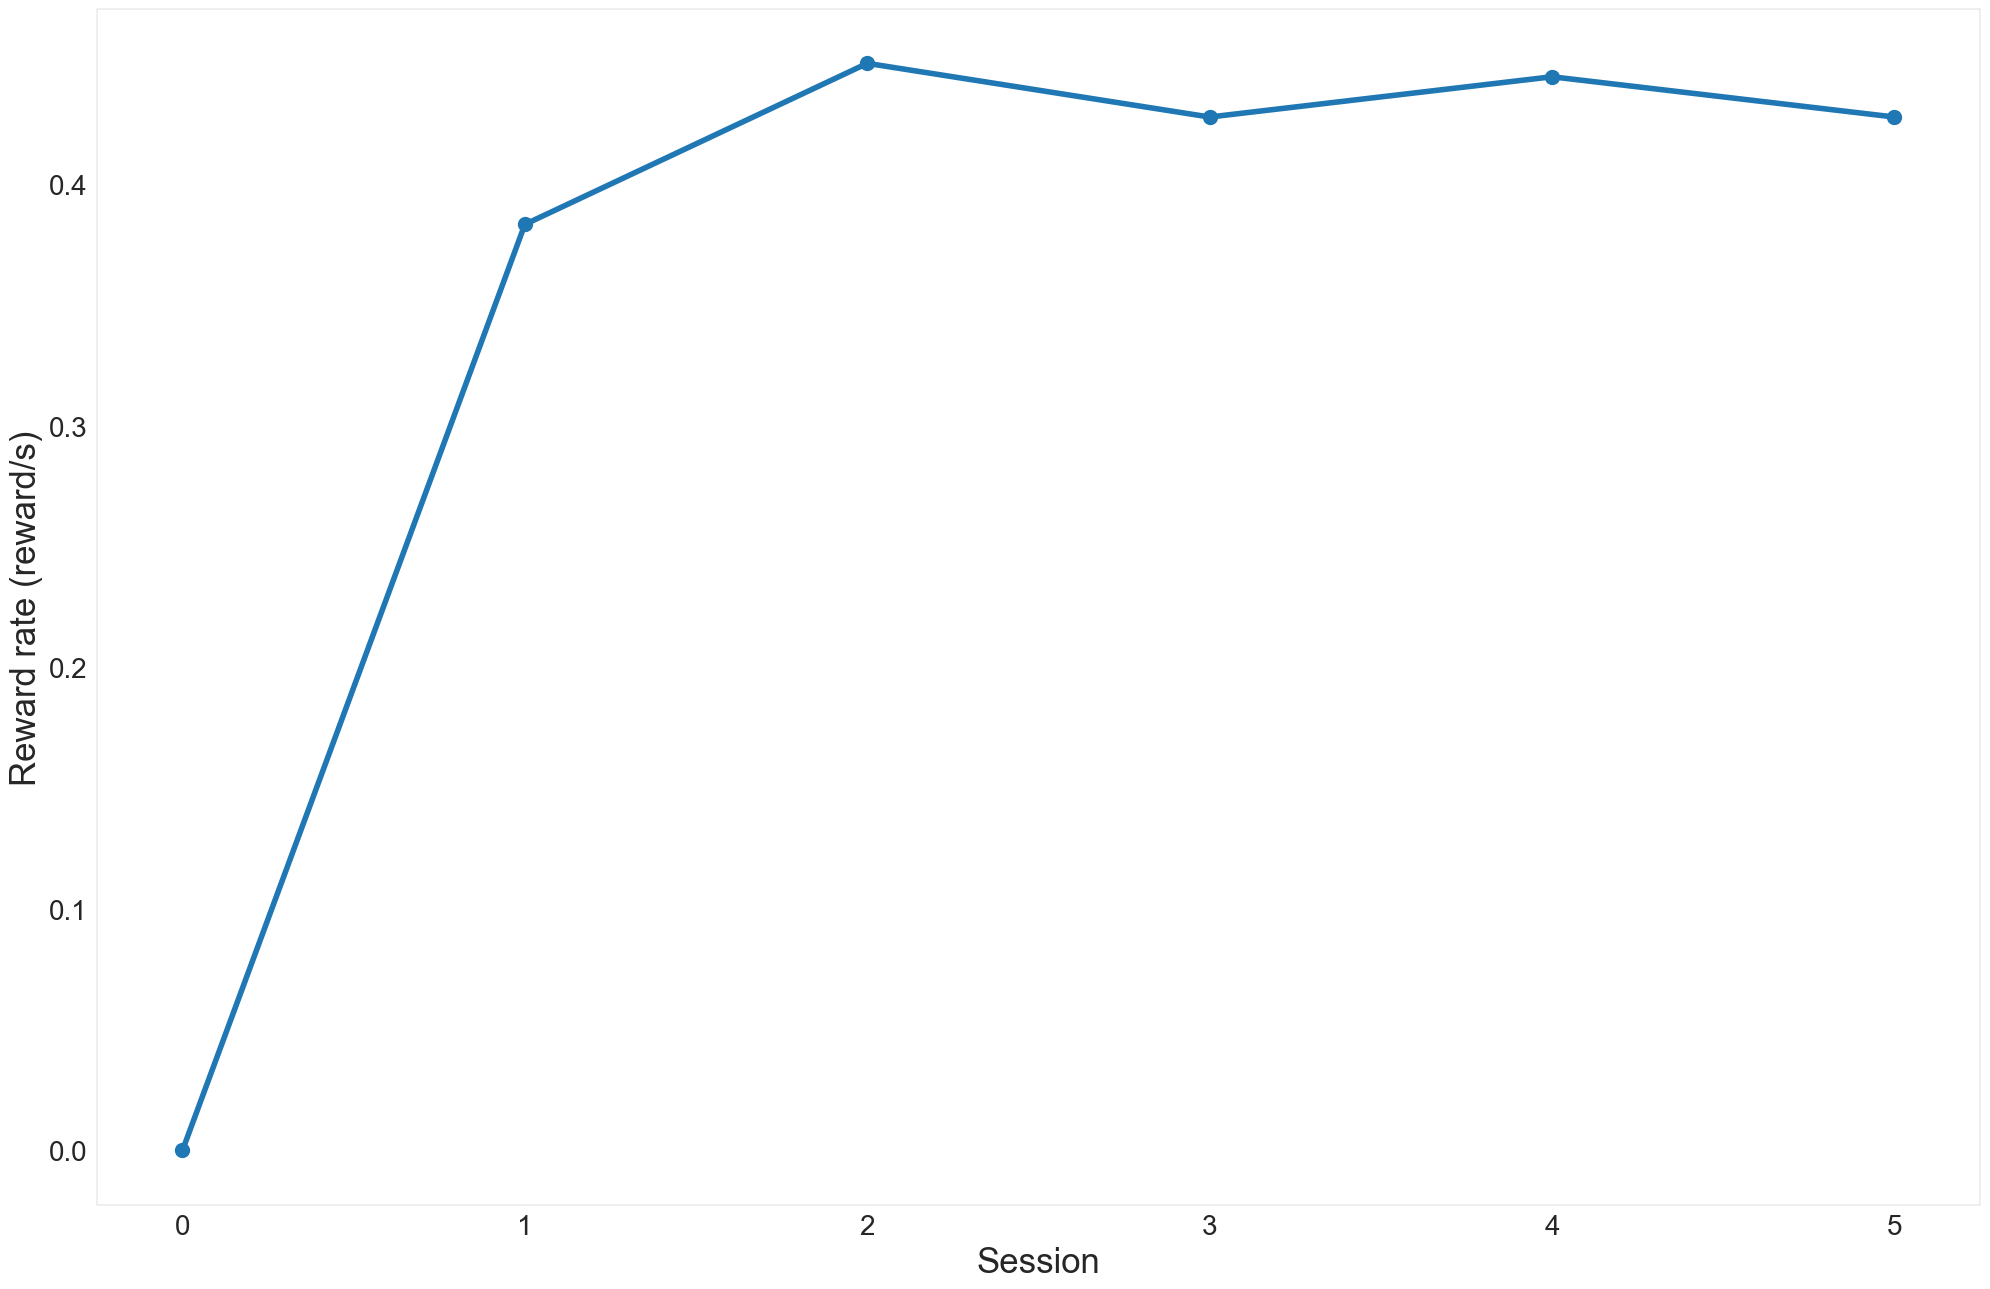

In [12]:
mouse = ReachingTask(3, alpha=0.5)
performance = learning_performance(mouse, correlations_ctx, 180000)
fig, axes = plt.subplots(sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes.plot(performance, marker='o', linewidth=4, markersize=10)
axes.set_ylabel('Reward rate (reward/s)', fontsize=25)
axes.set_xlabel('Session', fontsize=25)
plt.savefig('./learning-0005-1600-600-5-1000-v0-learning-performance.svg', dpi=300, bbox_inches = "tight", format='svg')
plt.show()